In [12]:
import pandas as pd
import os

# Define file paths
file_path_2007_2018 = '/content/drive/MyDrive/COLOMBIA/datos/datos_2007_2018.xlsx'
file_path_2019_2024 = '/content/drive/MyDrive/COLOMBIA/datos/datos_2019_2024.xlsx'
output_dir = '/content/drive/MyDrive/COLOMBIA/datos'
output_filename = 'datos_2007_20249.xlsx'
output_path = os.path.join(output_dir, output_filename)

# Read the Excel files
try:
    df_2007_2018 = pd.read_excel(file_path_2007_2018)
    df_2019_2024 = pd.read_excel(file_path_2019_2024)

    # Concatenate the dataframes
    df_combined = pd.concat([df_2007_2018, df_2019_2024], ignore_index=True)

    # Define columns to ensure consistency, sort, and unify writing style
    consistency_cols = [
        'DEPARTAMENTO',
        'GRUPO DE CULTIVO',
        'SUBGRUPO DE CULTIVO',
        'CULTIVO',
        'ESTADO FISICO PRODUCCION',
        'NOMBRE \nCIENTIFICO',
        'CICLO DE CULTIVO',
        'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO'
        ]

    # Standardize text columns by stripping whitespace, converting to lowercase, and capitalizing the first letter of each word
    for col in consistency_cols:
        # Check if the column exists in the dataframe before processing
        if col in df_combined.columns:
            df_combined[col] = df_combined[col].astype(str).str.strip().str.lower().str.title()
        else:
            print(f"Warning: Column '{col}' not found in one or both dataframes. Skipping consistency check and sorting for this column.")


    # Sort the dataframe by the specified columns, ignoring columns that were not found
    cols_to_sort = [col for col in consistency_cols if col in df_combined.columns]
    df_combined = df_combined.sort_values(by=cols_to_sort)

    # Save the combined dataframe to a new Excel file
    df_combined.to_excel(output_path, index=False)

    print(f"Successfully combined, standardized, and sorted data and saved to {output_path}")

except FileNotFoundError as e:
    print(f"Error: One of the input files was not found. {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully combined, standardized, and sorted data and saved to /content/drive/MyDrive/COLOMBIA/datos/datos_2007_20249.xlsx


In [13]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.6 MB/s eta 0:00:00


In [14]:
import pandas as pd
from unidecode import unidecode

# Define file paths
input_file_path = "/content/drive/MyDrive/COLOMBIA/datos/1.xlsx"
output_dir = "/content/drive/MyDrive/COLOMBIA/datos"
output_filename = "hola.xlsx"
output_path = os.path.join(output_dir, output_filename)

# Read the Excel file
try:
    df = pd.read_excel(input_file_path)

    # Function to remove accents from a string
    def remove_accents(text):
        if isinstance(text, str):
            return unidecode(text)
        return text

    # Apply the function to all string columns
    for col in df.columns:
        df[col] = df[col].apply(remove_accents)

    # Save the modified dataframe to a new Excel file
    df.to_excel(output_path, index=False)

    print(f"Successfully removed accents and saved data to {output_path}")

except FileNotFoundError as e:
    print(f"Error: The input file was not found. {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully removed accents and saved data to /content/drive/MyDrive/COLOMBIA/datos/hola.xlsx


# **Análisis exploratorio de los datos**

**Cantidad de filas y columnas**

In [8]:
import pandas as pd

excel_file_path_combined = "/content/drive/MyDrive/COLOMBIA/datos/datos_2007_2024.xlsx"
df_combined = pd.read_excel(excel_file_path_combined)

print(f"Número total de filas: {df_combined.shape[0]}")
print(f"Número total de columnas: {df_combined.shape[1]}")

Número total de filas: 351920
Número total de columnas: 17


**cantidad de datos faltantes por columna**

In [9]:
missing_values = df_combined.isnull().sum()
print("Cantidad de valores faltantes por columna:")
print(missing_values)

Cantidad de valores faltantes por columna:
Codigo departamento                                 0
DEPARTAMENTO                                        0
Codigo municipio                                    0
Municipio                                           0
GRUPO DE CULTIVO                                    0
SUBGRUPO DE CULTIVO                                 0
CULTIVO                                             0
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO       0
AÑO                                                 0
PERIODO                                             0
Área Sembrada\n(ha)                                 0
Área Cosechada\n(ha)                                0
Producción\n(t)                                     0
Rendimiento\n(t/ha)                              3558
ESTADO FISICO PRODUCCION                            0
NOMBRE \nCIENTIFICO                                 0
CICLO DE CULTIVO                                    0
dtype: int64


**cantidad de cultivos que se tiene**

In [10]:
num_unique_cultivos = df_combined['CULTIVO'].nunique()
print(f"Número de cultivos diferentes registrados: {num_unique_cultivos}")

Número de cultivos diferentes registrados: 249


**gráfico de los 10 cultivos con mayor área sembrada**

/tmp/ipython-input-357989960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_planted_area.index, y=top_10_planted_area.values, palette='viridis')


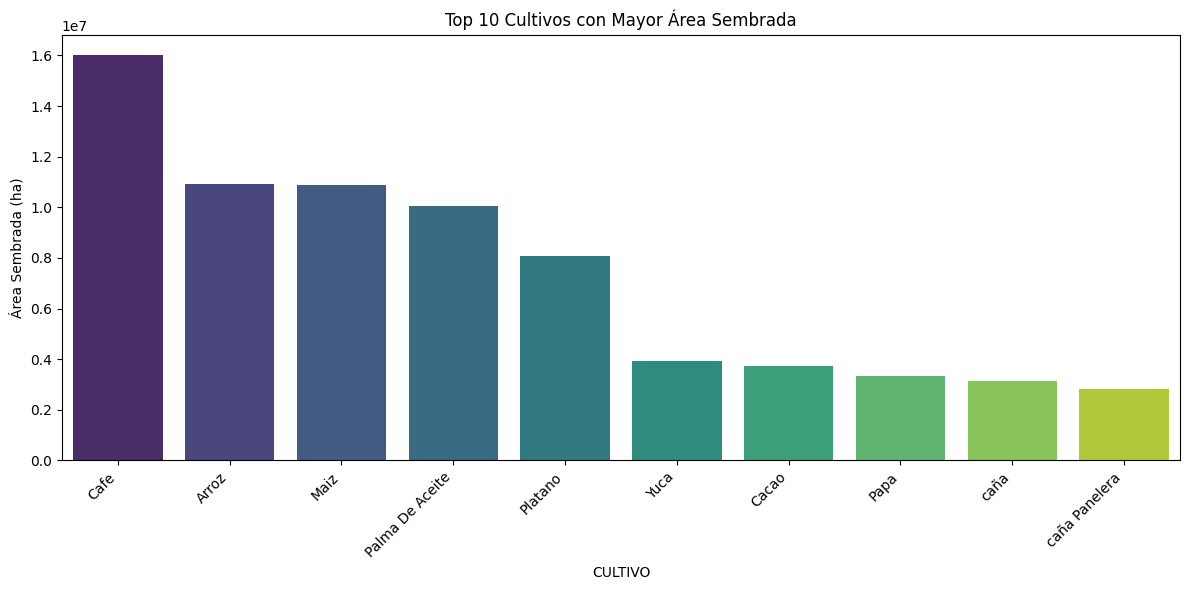

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'CULTIVO' and sum 'Área Sembrada\n(ha)', then get the top 10
top_10_planted_area = df_combined.groupby('CULTIVO')['Área Sembrada\n(ha)'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_planted_area.index, y=top_10_planted_area.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('CULTIVO')
plt.ylabel('Área Sembrada (ha)')
plt.title('Top 10 Cultivos con Mayor Área Sembrada')
plt.tight_layout()
plt.show()